In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
dataset=pd.read_csv('/content/1_boston_housing.csv')
dataset.fillna(method='ffill',inplace=True)


In [3]:
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

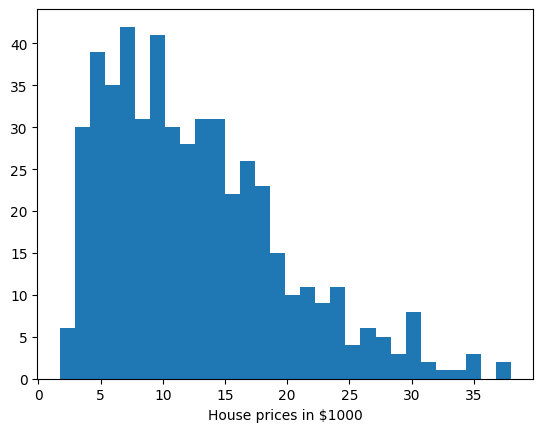

In [4]:
plt.hist(dataset['lstat'],bins=30)
plt.xlabel("House prices in $1000")
plt.show()

In [5]:
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


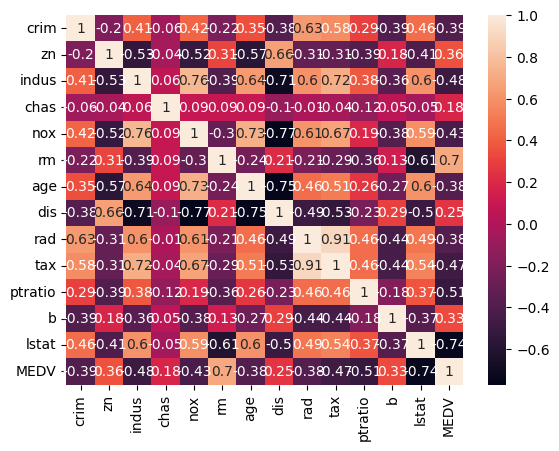

In [6]:
cor=dataset.corr().round(2)
sns.heatmap(data=cor,annot=True)
plt.show()

In [7]:
X = dataset.loc[:, dataset.columns != 'MEDV']
y = dataset.loc[:, dataset.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [9]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)


In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [11]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13),name='input_layer'),
    tf.keras.layers.Dense(100,name='hidden_layer_2'),
    tf.keras.layers.BatchNormalization(name='hidden_layer_3'),
    tf.keras.layers.Dense(50,name='hidden_layer_4'),
    tf.keras.layers.Dense(1,name='output_layer'),
])

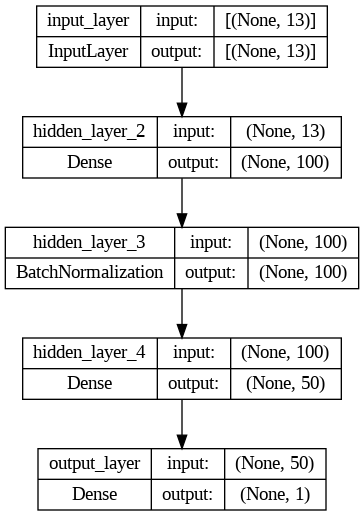

In [12]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [13]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_2 (Dense)      (None, 100)               1400      
                                                                 
 hidden_layer_3 (BatchNorma  (None, 100)               400       
 lization)                                                       
                                                                 
 hidden_layer_4 (Dense)      (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 6901 (26.96 KB)
Trainable params: 6701 (26.18 KB)
Non-trainable params: 200 (800.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [15]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Epoch 1/20
12/12 [==============================] - 4s 76ms/step - loss: 573.5319 - mae: 22.6475 - val_loss: 556.7855 - val_mae: 22.0080
Epoch 2/20
12/12 [==============================] - 0s 17ms/step - loss: 540.5879 - mae: 22.3340 - val_loss: 542.5922 - val_mae: 21.7445
Epoch 3/20
12/12 [==============================] - 0s 25ms/step - loss: 509.8202 - mae: 21.9248 - val_loss: 516.1698 - val_mae: 21.1760
Epoch 4/20
12/12 [==============================] - 0s 17ms/step - loss: 480.4749 - mae: 21.3380 - val_loss: 492.8457 - val_mae: 20.6803
Epoch 5/20
12/12 [==============================] - 0s 15ms/step - loss: 451.0810 - mae: 20.5445 - val_loss: 457.3774 - val_mae: 19.8281
Epoch 6/20
12/12 [==============================] - 0s 28ms/step - loss: 406.2751 - mae: 19.4976 - val_loss: 399.7060 - val_mae: 18.3333
Epoch 7/20
12/12 [==============================] - 0s 18ms/step - loss: 350.6773 - mae: 17.9262 - val_loss: 320.0103 - val_mae: 16.0476
Epoch 8/20
12/12 [=======================

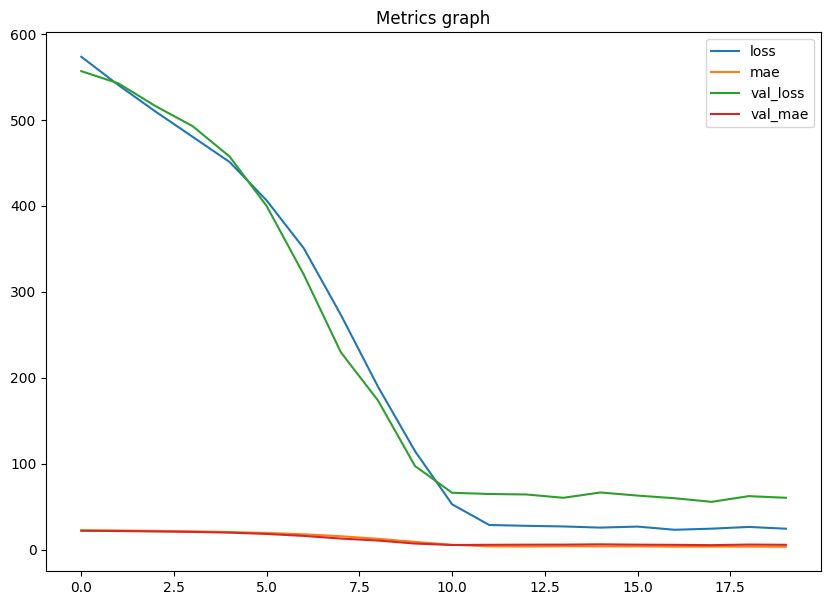

In [16]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Metrics graph")
plt.show()

In [17]:
y_pred=model.predict(X_test)

5/5 [==============================] - 0s 7ms/step


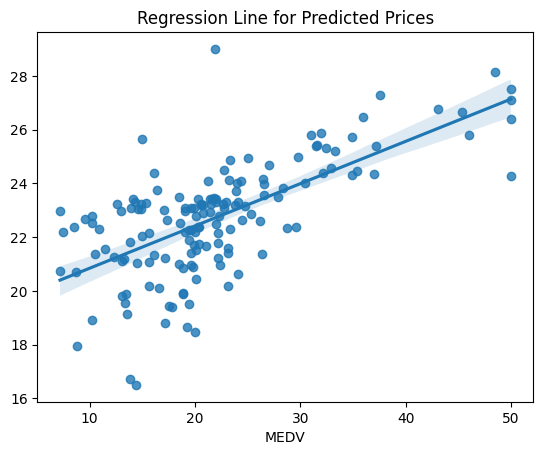

In [18]:
sns.regplot(x=y_test , y=y_pred)
plt.title("Regression Line for Predicted Prices")
plt.show()

In [19]:
def regression_metrics(y_test,y_pred):
  print(f"MAE is {metrics.mean_absolute_error(y_test,y_pred)}")
  print(f"MSE is {metrics.mean_squared_error(y_test,y_pred)}")
  print(f"MAE is {metrics.r2_score(y_test,y_pred)}")

In [20]:
from sklearn import metrics
regression_metrics(y_test,y_pred)

MAE is 5.684899182068674
MSE is 60.40700539643474
MAE is 0.2526483782242567
